# Myosine anisotropy analysis

In [33]:
# HIDE CODE

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

import functions

### Load compute values from Matlab script

In [34]:
# HIDE CODE
boxSize = 128       # window pixel size
overlap = 0.5       # window overlap
pixelSize = 0.313   # pixel size

# Load analysis csv
path = r'../data'
df = pd.read_csv(os.path.join(path, 'quantification.csv'))
df["Distance"] = df["Distance"] - 1
df.head()

Phenotype  Animal  Area  Distance  ...     Angle  SymAngle     Shear  Weight
0        wt  wt1_sg     1         0  ...  2.844076  0.297517  0.184577     1.0
1        wt  wt1_sg     1         1  ...  0.046996  0.046996  0.249474     1.0
2        wt  wt1_sg     1         2  ...  3.096377  0.045215  0.465363     1.0
3        wt  wt1_sg     1         3  ...  2.917614  0.223979  0.343645     1.0
4        wt  wt1_sg     1         4  ...  2.940003  0.201590  0.382913     1.0

[5 rows x 9 columns]

### Converte angle to degree and average values

In [35]:
# HIDE CODE
data = functions.compute_myosine_orientation(df, boxSize, pixelSize, overlap)
dmin = data["Distance"].min()
dmax = data["Distance"].max()
data.head()

Phenotype   Animal  Distance  Area  ...     Shear  Weight  SymAngleDeg    AngleDeg
0        mu  mut1_sg       0.0     3  ...  0.135266     1.0    21.097938  104.996444
1        mu  mut1_sg      20.0     3  ...  0.131931     1.0    44.690926  113.104754
2        mu  mut1_sg      40.0     3  ...  0.142857     1.0    68.624292  101.810566
3        mu  mut1_sg      60.0     3  ...  0.144526     1.0    69.946315   78.197022
4        mu  mut1_sg      80.0     3  ...  0.134224     1.0    50.013358  109.177945

[5 rows x 11 columns]

### Plot Myosine orientation distribution

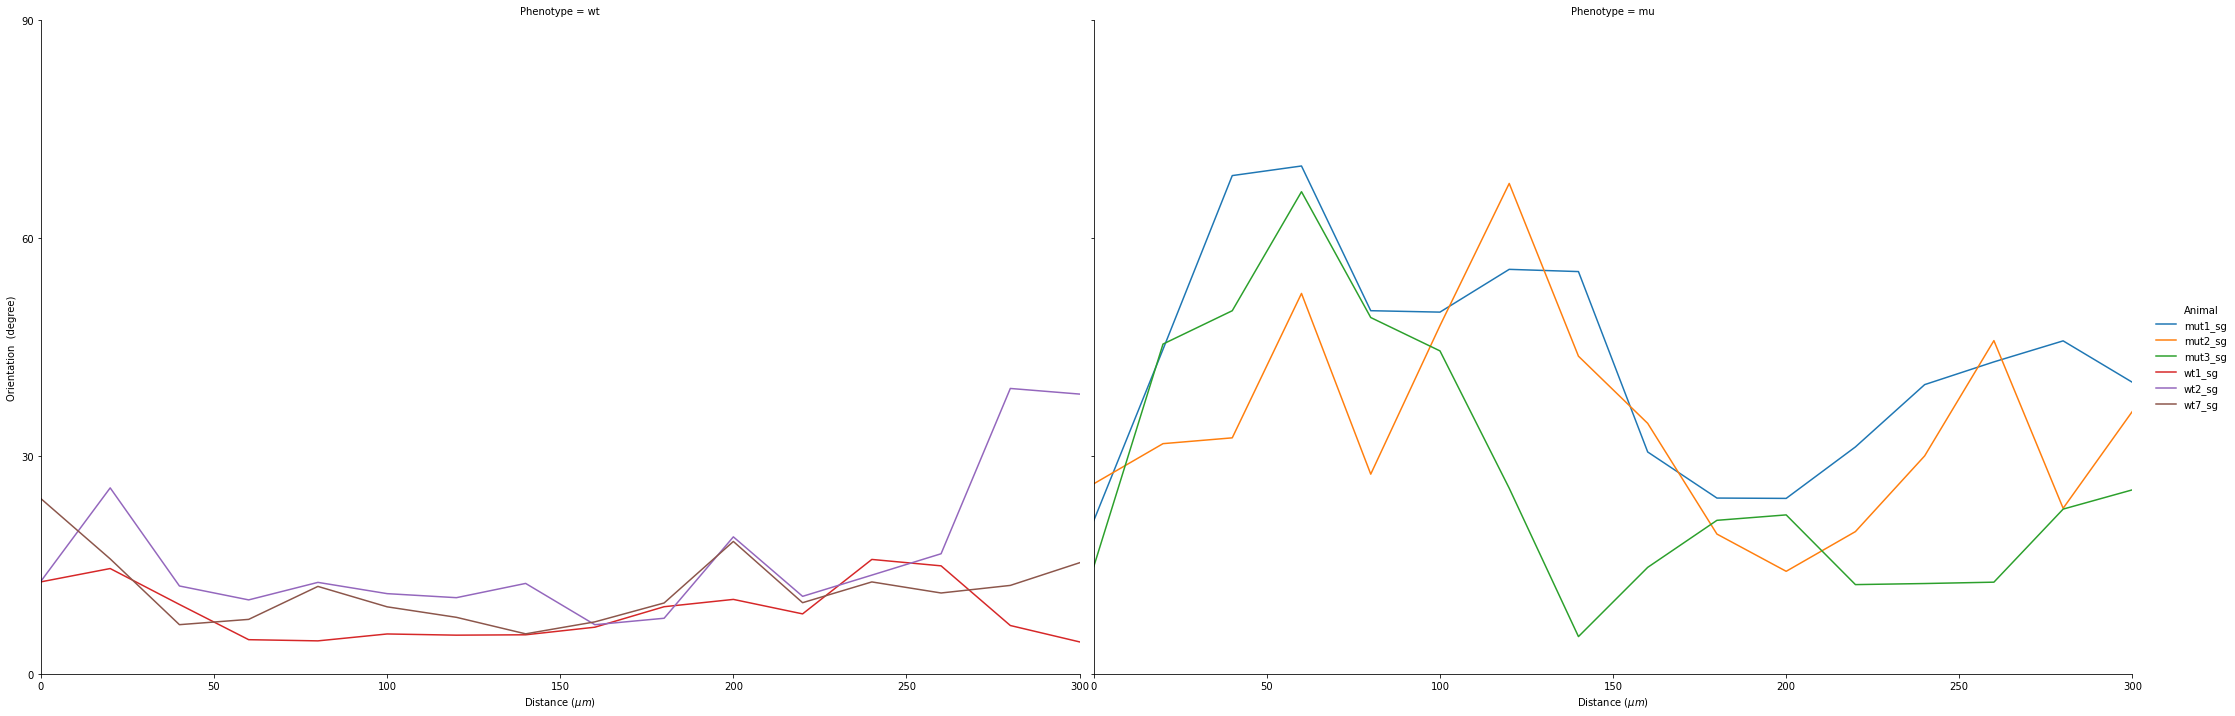

In [36]:
# HIDE CODE
f = sns.relplot(x='Distance', y='SymAngleDeg', hue='Animal', data=data, kind='line', col='Phenotype', col_order=("wt", "mu"), height=10, aspect=1.5)
f.set( ylabel='Orientation  (degree)', xlabel='Distance ($\mu m$)', ylim=(0,90), yticks=[0,30,60,90], xlim=(dmin,dmax))
plt.savefig("./detailled.pdf")

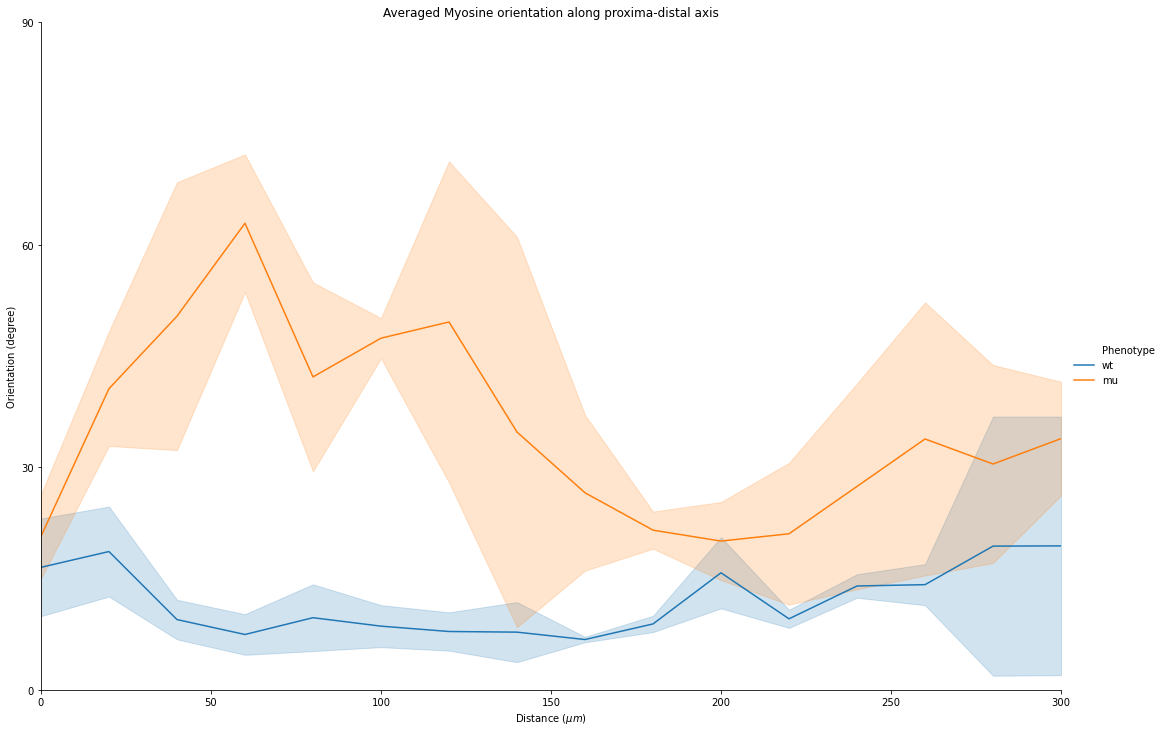

In [37]:

# HIDE CODE
f = sns.relplot(x='Distance', y='SymAngleDeg', hue='Phenotype', hue_order=("wt", "mu"), data=data, kind='line', ci="sd", height=10, aspect=1.5)
f.set(ylabel='Orientation (degree)', xlabel='Distance ($\mu m$)', ylim=(0,90), yticks=[0,30,60,90], xlim=(dmin,dmax), title="Averaged Myosine orientation along proxima-distal axis")

plt.savefig("./averaged.pdf")

[Text(0.5, 1.05, 'Myosine orientation histogram (0-90 degree).')]

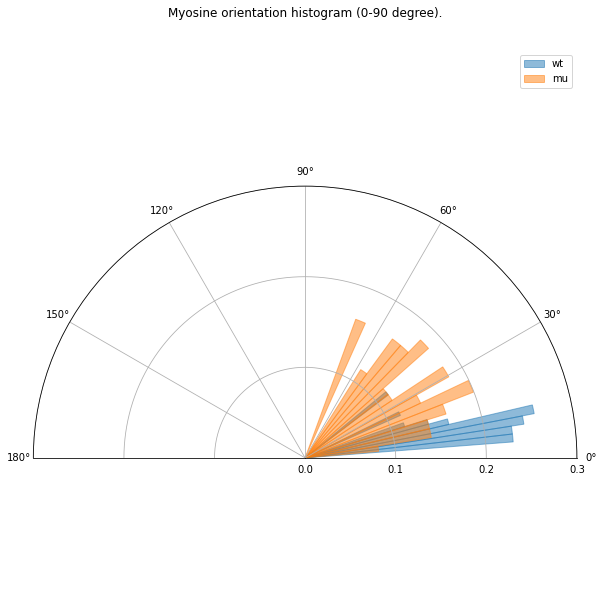

In [38]:
# HIDE CODE
wt_ind = data['Phenotype'] == 'wt'
mu_ind = data['Phenotype'] == 'mu'

fig, ax = plt.subplots(1, subplot_kw=dict(projection='polar'), figsize=(10,10))
functions.rose_plot(ax, data.loc[wt_ind, 'SymAngle'].values, bins=16, fill=True, alpha=0.5, density=True, color='C0')
functions.rose_plot(ax, data.loc[mu_ind, 'SymAngle'].values, bins=16, fill=True, alpha=0.5, density=True, color='C1')
ax.legend(('wt', 'mu'))
ax.set(title="Myosine orientation histogram (0-90 degree).")

plt.savefig("./histo_16.pdf")
